# **OCENA RYZYKA KREDYTOWEGO** 
## - prognozowanie zdolności kredytowej klientów banku.

---

---

# 1. Wprowadzenie i opis problemu

> „Ryzyko kredytowe to prawdopodobieństwo, że kontrahent nie wypełni jednego lub wielu warunków kontraktu z powodu braku możliwości wywiązania się ze swoich zobowiązań finansowych.” - [bankier](https://www.bankier.pl/smart/ryzyko-kredytowe-ocena-analiza-i-zarzadzanie-ryzykiem-kredytowym)

Celem projektu jest **ocena ryzyka kredytowego** – czyli przewidywanie, czy klient banku - kredytobiorca ma zdolność do spłaty zaciągniętego zobowiązania. Tego typu prognozy są kluczowe dla instytucji finansowych, ponieważ pomagają zdecydować, komu można bezpiecznie udzielić kredytu.

W praktyce banki wykorzystują tzw. **algorytmy credit scoringowe**, które na podstawie takich danych przewidują prawdopodobieństwo niespłacenia zobowiązania lub ogólnego pogorszenia się sytuacji finansowej klienta.

Celem mojego projektu będzie zbudowanie takiego modelu predykcyjnego i sprawdzenie, które cechy są najbardziej istotne przy ocenie ryzyka.

---

W ramach projektu zamierzam przeanalizować zbiór danych pochodzący z konkursu **Give Me Some Credit** (Kaggle), który zawiera anonimowe informacje o klientach instytucji finansowej, takie jak wiek, miesięczny dochód, liczba osób na utrzymaniu, historia spłat i opóźnień.

Moim celem będzie zbudowanie **modelu klasyfikacyjnego**, który na podstawie tych danych będzie prognozował, czy dany klient może w ciągu najbliższych dwóch lat znaleźć się w trudnej sytuacji finansowej (czyli doświadczyć problemów ze spłatą zobowiązań).

W projekcie przeprowadzę:
- **wstępną analizę danych** (EDA) w celu poznania rozkładów cech i zależności między zmiennymi,
- **przygotowanie danych** – oczyszczenie, kodowanie zmiennych kategorycznych, skalowanie danych numerycznych,
- **budowę modeli** – zaczynając od regresji logistycznej, a następnie porównam ją z bardziej złożonymi modelami jak Random Forest czy XGBoost,
- **ocenę skuteczności modeli** za pomocą metryk takich jak: accuracy, precision, recall, F1-score, AUC oraz confusion matrix,
- **interpretację wyników** – sprawdzę, które cechy mają największy wpływ na decyzje modelu (za pomocą wykresów ważności cech).

---

---

# 2. Opis zbioru danych

Zbiór danych pochodzi z konkursu [Give Me Some Credit](https://www.kaggle.com/competitions/GiveMeSomeCredit) i zawiera informacje o klientach instytucji finansowej.

Zbiór danych zawiera anonimowe informacje o kredytobiorcach i składa się z:
- **150 000 wierszy treningowych** - cs-training.csv (z etykietą `SeriousDlqin2yrs`, gdzie ~10 000 to przypadki pozytywne),
- **10 zmiennych wejściowych** (cech) oraz **1 zmienną docelową** (`SeriousDlqin2yrs`). Poniżej znajduje się krótki opis poszczególnych kolumn (z pliku Data_Dictionary.xls):

| **Nazwa kolumny** | **Opis** | **Typ** |
|-------------------|----------|---------|
| `SeriousDlqin2yrs` | Czy klient doświadczył zaległości 90 dni lub dłuższych w ciągu ostatnich 2 lat | Y/N (zmienna docelowa) |
| `RevolvingUtilizationOfUnsecuredLines` | Proporcja wykorzystanych linii kredytowych (z wyłączeniem kredytów ratalnych i nieruchomości) | procent |
| `age` | Wiek kredytobiorcy (w latach) | integer |
| `NumberOfTime30-59DaysPastDueNotWorse` | Liczba przypadków opóźnień 30–59 dni, ale nie większych, w ostatnich 2 latach | integer |
| `DebtRatio` | Wskaźnik zadłużenia: miesięczne zobowiązania / miesięczny dochód brutto | procent |
| `MonthlyIncome` | Miesięczny dochód | real |
| `NumberOfOpenCreditLinesAndLoans` | Liczba aktywnych kredytów i kart kredytowych | integer |
| `NumberOfTimes90DaysLate` | Liczba przypadków opóźnień powyżej 90 dni | integer |
| `NumberRealEstateLoansOrLines` | Liczba kredytów hipotecznych i pożyczek na nieruchomości | integer |
| `NumberOfTime60-89DaysPastDueNotWorse` | Liczba przypadków opóźnień 60–89 dni, ale nie większych | integer |
| `NumberOfDependents` | Liczba osób na utrzymaniu (bez samego kredytobiorcy) | integer |

Wszystkie cechy mają charakter liczbowy, a dane są częściowo zanonimizowane – nie zawierają danych osobowych ani informacji tekstowych.


---

---

# 3. Wczytanie danych i wstępna analiza (EDA)

Wczytanie zbioru danych `cs-training.csv` i wstępna eksploracyjna analiza danych (EDA - Exploratory data analysis), aby lepiej zrozumieć strukturę i zawartość zbioru.

Zakres analizy:
- podgląd pierwszych wierszy danych oraz podstawowe informacje o kolumnach,
- sprawdzenie braków danych oraz typów zmiennych,
- analiza statystyk opisowych dla cech liczbowych,
- histogramy i rozkłady cech, z uwzględnieniem danych dyskretnych i wartości odstających,
- analiza korelacji między zmiennymi numerycznymi (macierz korelacji),
- rozkład klasy docelowej `SeriousDlqin2yrs`

Analiza ta pozwala zidentyfikować potencjalne problemy w danych (braki, outliery, niezbalansowane klasy) i lepiej przygotować dane do dalszego modelowania.

---

## Import bibliotek, wczytanie i podgląd danych (shape, head)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# estetyka wykresów
sns.set_theme(style="whitegrid")

df = pd.read_csv("cs-training.csv")

# usunięcie kolumny z numerem wiersza
df = df.drop(columns=["Unnamed: 0"])

print(df.shape)  # sprawdzenie liczby wierszy i kolumn
df.head()

(150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


---

## Informacje o typach kolumn

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

---

## Informacje o brakach danych

In [3]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

---

## Statystyki opisowe

In [4]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


---

## Histogramy (rozkład cech)

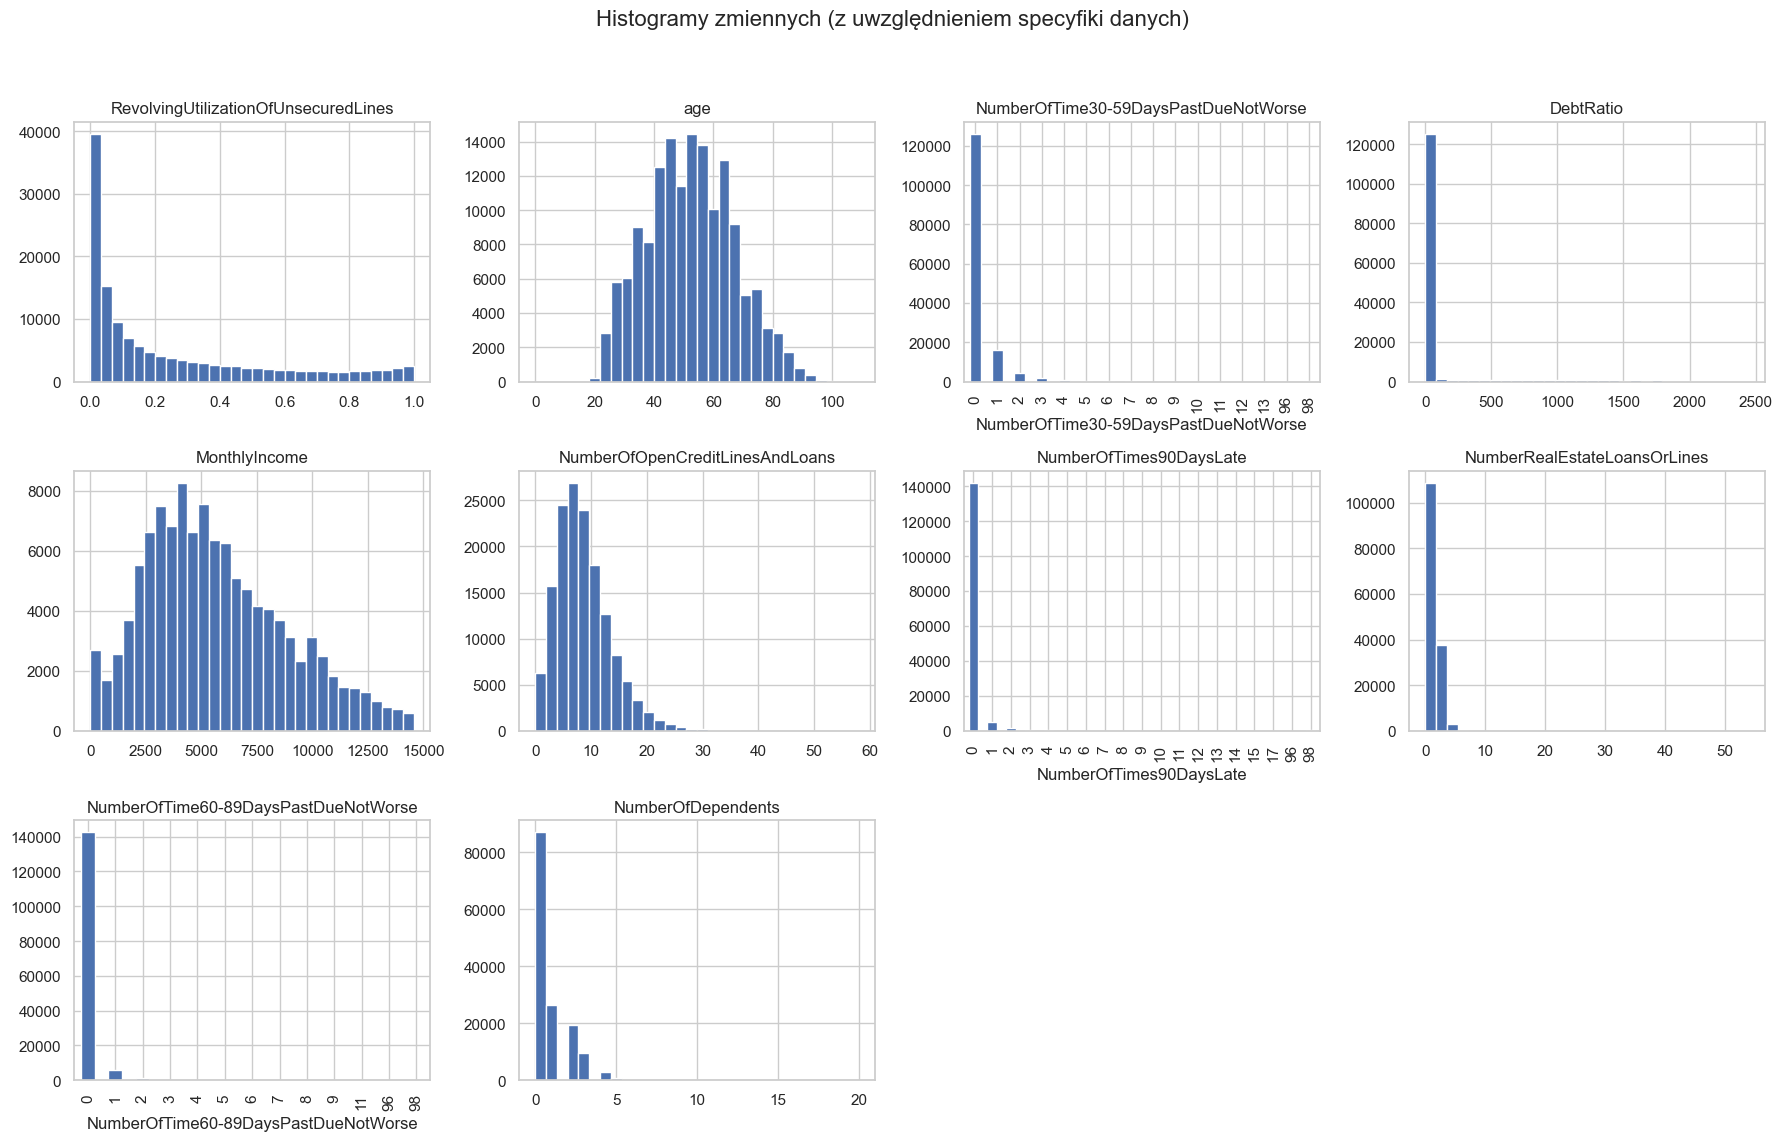

In [5]:
# zmienna dyskretne, które trzeba narysować jako wykresy słupkowe
discrete_vars = [
    'NumberOfTime30-59DaysPastDueNotWorse',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfTimes90DaysLate'
]

# zmienne ciągłe, w których występują bardzo duże wartości odstające
outlier_vars = [
    'MonthlyIncome',
    'DebtRatio',
    'RevolvingUtilizationOfUnsecuredLines'
]

# lista cech (bez zmiennej docelowej)
columns = [col for col in df.columns if col != "SeriousDlqin2yrs"]

# przygotowanie siatki wykresów
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    
    if col in discrete_vars:
        # słupki dla danych dyskretnych
        df[col].value_counts().sort_index().plot(kind='bar', ax=ax)
    else:
        # obcięcie outlierów dla wskazanych kolumn
        data = df[col]
        if col in outlier_vars:
            data = data[data < data.quantile(0.95)]

        # zwykły histogram
        ax.hist(data.dropna(), bins=30)
    
    ax.set_title(col)

# Usunięcie pustych wykresów
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Histogramy zmiennych (z uwzględnieniem specyfiki danych)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---

## Korelacje między zmiennymi numerycznymi

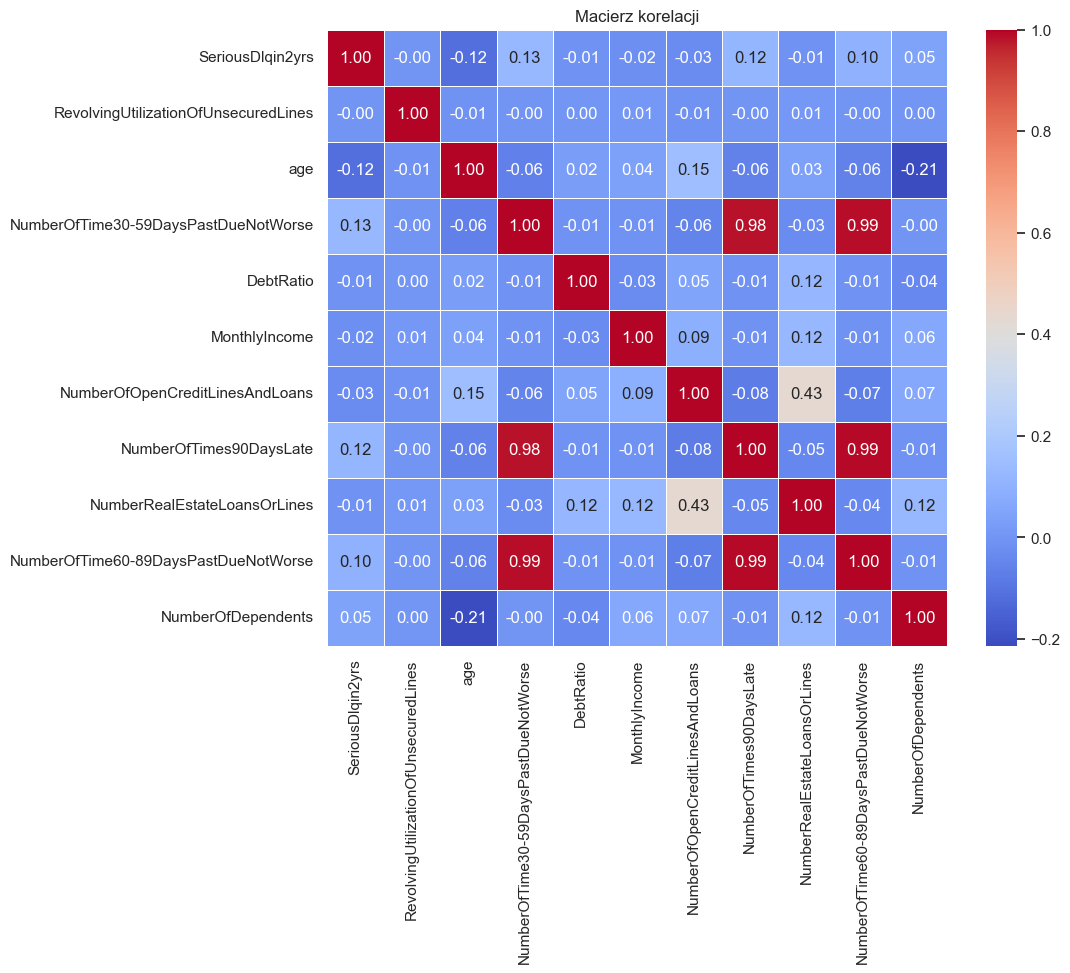

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Macierz korelacji")
plt.show()

---

# Rozkład zmiennej docelowej

   SeriousDlqin2yrs  Counts  Percent
0                 0  139974    93.32
1                 1   10026     6.68


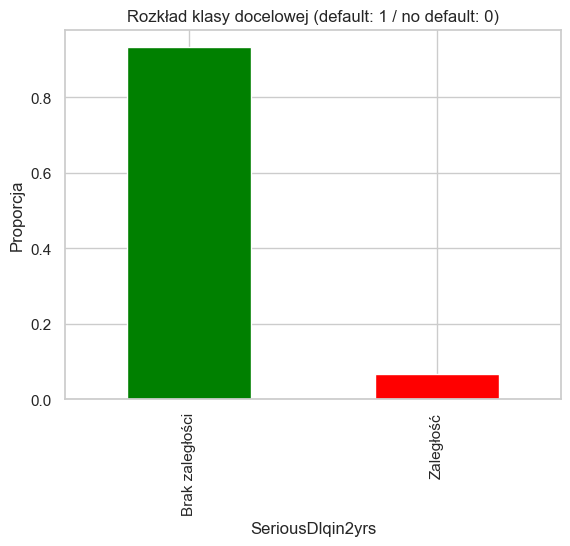

In [7]:
P = df['SeriousDlqin2yrs'].value_counts().reset_index()
P.columns = ['SeriousDlqin2yrs', 'Counts']
P['Percent'] = (P['Counts'] * 100 / P['Counts'].sum()).round(2)
print(P)

df['SeriousDlqin2yrs'].value_counts(normalize=True).plot(kind='bar', color=["green", "red"])
plt.title("Rozkład klasy docelowej (default: 1 / no default: 0)")
plt.xlabel("SeriousDlqin2yrs")
plt.ylabel("Proporcja")
plt.xticks(ticks=[0, 1], labels=["Brak zaległości", "Zaległość"])
plt.show()

---

---

# 4. Preprocessing

### Oczyszczanie danych

W tym kroku dane są czyszczone i wstępnie przygotowywane do modelowania. Dla każdej kolumny analizuję rozkład, wartości odstające i brakujące dane. Tam, gdzie to potrzebne, stosuję imputację lub transformację. Oto szczegóły:

- `SeriousDlqin2yrs` – zmienna docelowa (0 – brak zaległości, 1 – zaległość > 90 dni). Kolumna jest poprawna, nie wymaga zmian.

- `RevolvingUtilizationOfUnsecuredLines` – pokazuje, jaki procent dostępnego limitu kredytowego klient już wykorzystał (aktualne zadłużenie / dostępny limit). Wartości powinny mieścić się w zakresie [0, 1]. Tymczasem występują wartości dochodzące nawet do 50 000 (co nie ma sensu). Wszystkie wartości >1 traktowane są jako błędne i zamieniane na NaN, a następnie uzupełnione medianą (bo rozkład jest silnie skośny).

- `age` – wiek klienta. Minimalna wartość to 0, co jest niepoprawne. Takie przypadki zastępowane są medianą. Nie ma górnej granicy.

- `DebtRatio` – proporcja miesięcznych zobowiązań do dochodu. To również wskaźnik procentowy. Wartości >1 są nielogiczne (np. 3000%) i zamieniane są na NaN, następnie uzupełnione medianą.

- `MonthlyIncome` – miesięczny dochód. Zawiera brakujące dane (`NaN`) – zamiana na medianę. Wysokie wartości zostają (założenie, że są możliwe).

- `NumberOfOpenCreditLinesAndLoans` – liczba aktywnych kredytów i kart. Brak modyfikacji – duże wartości mogą mieć sens.

- `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfTimes90DaysLate` – liczba opóźnień w płatnościach w różnych zakresach dni. Występują w nich nietypowe wartości 96 i 98, które prawdopodobnie nie oznaczają rzeczywistej liczby opóźnień. Ich pozostawienie mogłoby zniekształcić rozkład i wpłynąć na modelowanie. Zamiana wartości na NaN, a następnie uzupełnienie medianą z pozostałych danych.

- `NumberRealEstateLoansOrLines` – liczba pożyczek hipotecznych lub linii kredytowych na nieruchomości. Rozkład pokazuje nieliczne wartości powyżej 10, z maksimum wynoszącym 54. Są traktowane jak poprawne.

- `NumberOfDependents` – liczba osób na utrzymaniu. Brakujące wartości uzupełnione medianą.


In [8]:
# RevolvingUtilizationOfUnsecuredLines
df.loc[df["RevolvingUtilizationOfUnsecuredLines"] > 1, "RevolvingUtilizationOfUnsecuredLines"] = np.nan
df['RevolvingUtilizationOfUnsecuredLines'] = df['RevolvingUtilizationOfUnsecuredLines'].fillna(df['RevolvingUtilizationOfUnsecuredLines'].median())

# age
df.loc[df["age"] < 18, "age"] = np.nan
df['age'] = df['age'].fillna(df['age'].median())

# DebtRatio
df.loc[df["DebtRatio"] > 1, "DebtRatio"] = np.nan
df['DebtRatio'] = df['DebtRatio'].fillna(df['DebtRatio'].median())

# MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())

# NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate
late_columns = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate"
]

for col in late_columns:
    df.loc[df[col].isin([96, 98]), col] = np.nan
    df[col] = df[col].fillna(df[col].median())

# NumberOfDependents
df["NumberOfDependents"] = df["NumberOfDependents"].fillna(df["NumberOfDependents"].median())

---

### Podział danych

Podział danych na cechy (`X`) i etykietę (`y`), a następnie stratified split (dla zachowania proporcji klas) – 80% danych do treningu, 20% do testów.

In [9]:
from sklearn.model_selection import train_test_split

# oddzielenie cech i etykiety
X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]

# podział na zbiór treningowy i testowy (stratyfikacja ze względu na klasę)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

---

---

## 5. Trening i porównanie modeli klasyfikacyjnych

Trenowanie kilku wybranych modeli klasyfikacyjnych i porównanie ich skuteczności. Ocena przy użyciu 5-krotnej walidacji krzyżowej (`cross_val_score`) z metryką `roc_auc`. Wszystkie modele uczone są na danych zeskalowanych za pomocą `StandardScaler`.

Modele bazowe:
- `LogisticRegression`
- `RandomForestClassifier`
- `XGBClassifier`
- `KNeighborsClassifier`

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np
import pandas as pd

# modele
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42, penalty='l2', C=1.0),
    "RandomForest": RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, class_weight='balanced', random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    "XGBClassifier": XGBClassifier(learning_rate=0.1, max_depth=3, eval_metric='logloss', random_state=42, n_estimators=50)
}

# walidacja krzyżowa
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# zbieranie wyników
results = {
    "Model": [],
    "Mean F1": [],
    "Std F1": [],
    "Mean ROC AUC": [],
    "Std ROC AUC": []
}

for name, model in models.items():
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])

    f1 = cross_val_score(pipe, X_train, y_train, cv=cv, scoring=make_scorer(f1_score), n_jobs=-1)
    roc = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1)

    results["Model"].append(name)
    results["Mean F1"].append(np.round(np.mean(f1), 4))
    results["Std F1"].append(np.round(np.std(f1), 4))
    results["Mean ROC AUC"].append(np.round(np.mean(roc), 4))
    results["Std ROC AUC"].append(np.round(np.std(roc), 4))

results_df = pd.DataFrame(results)
results_df.sort_values("Mean ROC AUC", ascending=False)

,Model,Mean F1,Std F1,Mean ROC AUC,Std ROC AUC
3,XGBClassifier,0.2403,0.0063,0.8586,0.0038
0,LogisticRegression,0.2428,0.0104,0.8403,0.0035
1,RandomForest,0.2244,0.0094,0.8276,0.0035
2,KNeighbors,0.2569,0.0119,0.7332,0.0035


---

### Wyniki

- `XGBClassifier` – najlepszy ROC AUC, dobry F1
- `LogisticRegression` – najlepszy F1, bardzo dobry ROC AUC

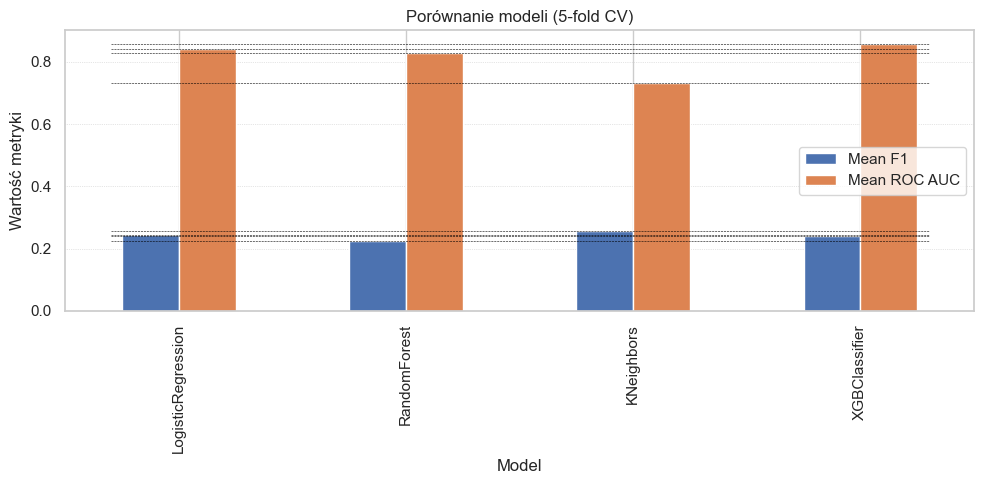

In [11]:
import matplotlib.pyplot as plt

# wykres słupkowy
ax = results_df.set_index("Model")[["Mean F1", "Mean ROC AUC"]].plot(
    kind="bar", figsize=(10, 5), title="Porównanie modeli (5-fold CV)"
)

# dodanie poziomych linii
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.axhline(y=height, color='black', linestyle='--', linewidth=0.4, xmin=0.05, xmax=0.95)

plt.ylabel("Wartość metryki")
plt.grid(True, axis='y', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()


---

---

# 6. Dobór hiperparametrów z GridSearchCV

### Logistic Regression

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# pipeline
pipe_logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(random_state=42, max_iter=1000))
])

# siatka hiperparametrów
param_grid_logreg = {
    "clf__C": [0.01, 0.1, 1, 10, 100],          # siła regularyzacji
    "clf__penalty": ["l1", "l2"],               # rodzaj normy
    "clf__solver": ["liblinear"]                # solver wspierający l1
}

# gridSearchCV
grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5, scoring="roc_auc", n_jobs=-1)
grid_logreg.fit(X_train, y_train)

print("Najlepsze parametry:", grid_logreg.best_params_)
print("Najlepszy wynik ROC AUC (CV):", grid_logreg.best_score_)


Najlepsze parametry: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Najlepszy wynik ROC AUC (CV): 0.8413091302037333


---

### XGBClassifier

In [13]:
from xgboost import XGBClassifier

pipe_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", XGBClassifier(eval_metric="logloss", random_state=42))
])

param_grid_xgb = {
    "clf__n_estimators": [50, 100, 200],
    "clf__max_depth": [3, 5, 7],
    "clf__learning_rate": [0.01, 0.1, 0.2],
    "clf__subsample": [0.8, 1.0]
}

grid_xgb = GridSearchCV(pipe_xgb, param_grid_xgb, cv=5, scoring="roc_auc", n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Najlepsze parametry:", grid_xgb.best_params_)
print("Najlepszy wynik ROC AUC (CV):", grid_xgb.best_score_)


Najlepsze parametry: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 100, 'clf__subsample': 0.8}
Najlepszy wynik ROC AUC (CV): 0.8621626981279299


---

---

# 7. Test końcowy i wizualizacja wyników

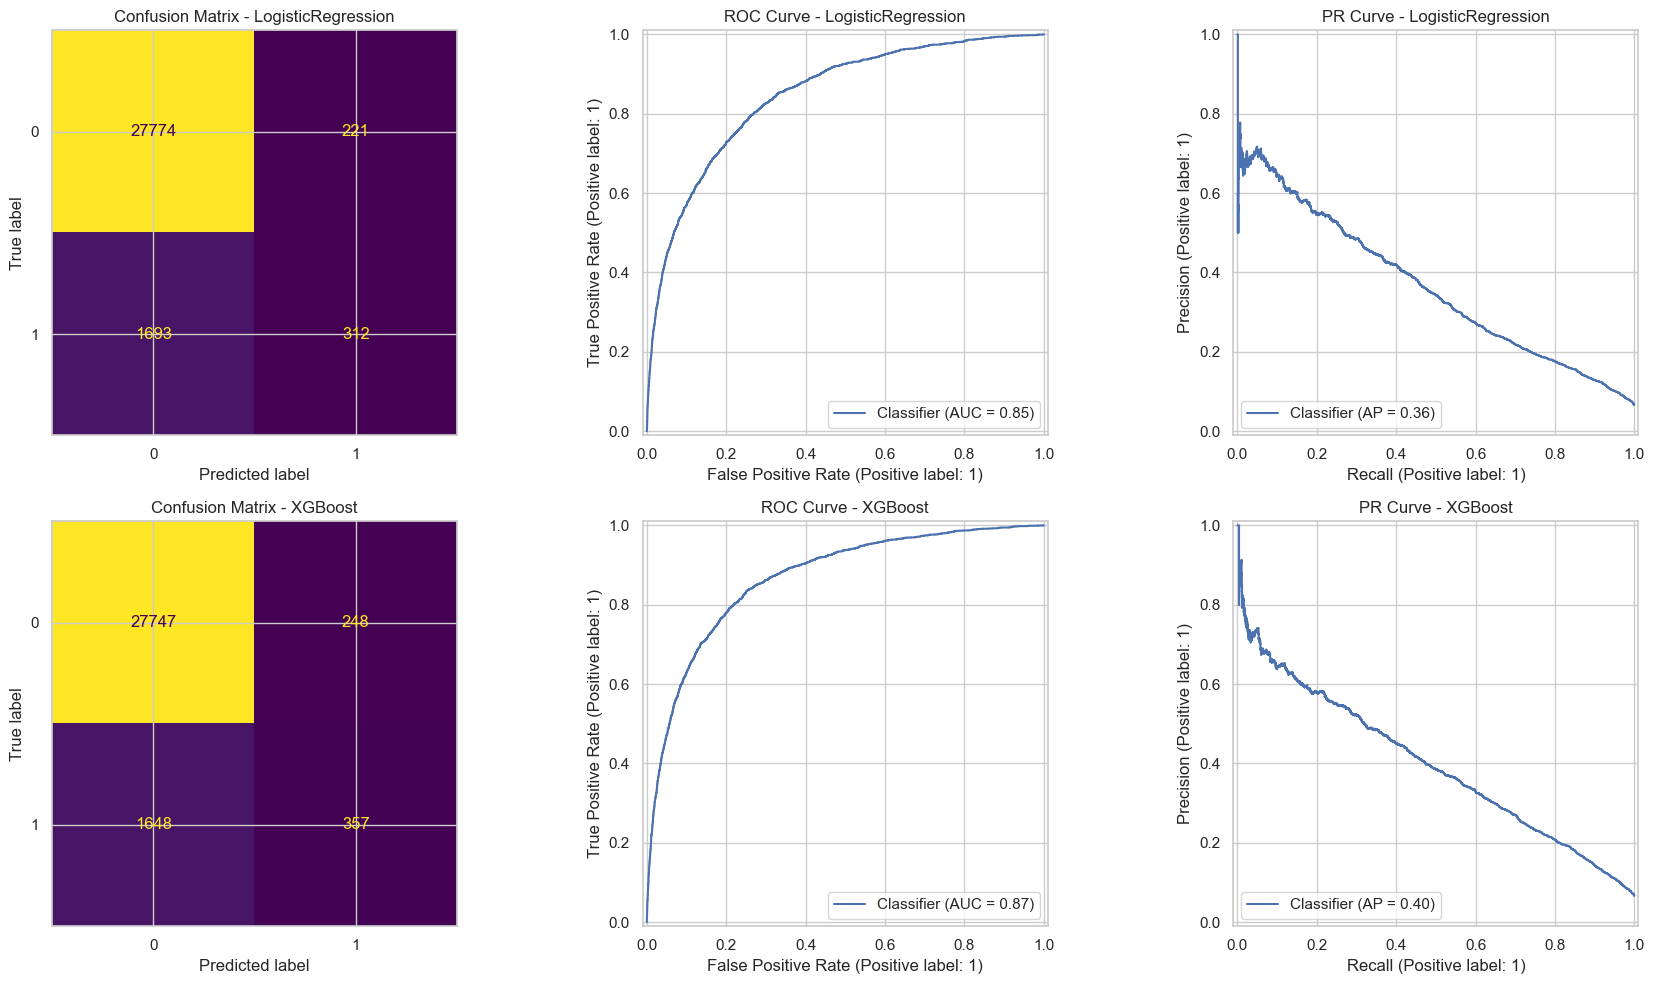

In [14]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# najlepsze modele z GridSearchCV
best_logreg = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(C=0.01, penalty='l2', solver='liblinear', random_state=42, max_iter=1000))
])

best_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", XGBClassifier(
        learning_rate=0.1,
        max_depth=5,
        n_estimators=100,
        subsample=0.8,
        eval_metric='logloss',
        random_state=42
    ))
])

# trenowanie i predykcja
best_logreg.fit(X_train, y_train)
best_xgb.fit(X_train, y_train)

y_pred_logreg = best_logreg.predict(X_test)
y_proba_logreg = best_logreg.predict_proba(X_test)[:, 1]

y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

# obliczenie metryk
def compute_metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "ROC AUC": roc_auc_score(y_true, y_proba)
    }

metrics_logreg = compute_metrics(y_test, y_pred_logreg, y_proba_logreg)
metrics_xgb = compute_metrics(y_test, y_pred_xgb, y_proba_xgb)

results_test = pd.DataFrame([metrics_logreg, metrics_xgb], index=["LogisticRegression", "XGBoost"])

# wykresy
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg, ax=axs[0, 0], colorbar=False)
axs[0, 0].set_title("Confusion Matrix - LogisticRegression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axs[1, 0], colorbar=False)
axs[1, 0].set_title("Confusion Matrix - XGBoost")

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba_logreg, ax=axs[0, 1])
axs[0, 1].set_title("ROC Curve - LogisticRegression")

RocCurveDisplay.from_predictions(y_test, y_proba_xgb, ax=axs[1, 1])
axs[1, 1].set_title("ROC Curve - XGBoost")

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_proba_logreg, ax=axs[0, 2])
axs[0, 2].set_title("PR Curve - LogisticRegression")

PrecisionRecallDisplay.from_predictions(y_test, y_proba_xgb, ax=axs[1, 2])
axs[1, 2].set_title("PR Curve - XGBoost")

plt.tight_layout()
plt.show()


---

---

# 8. Interpretacja modelu

### Regresja logistyczna

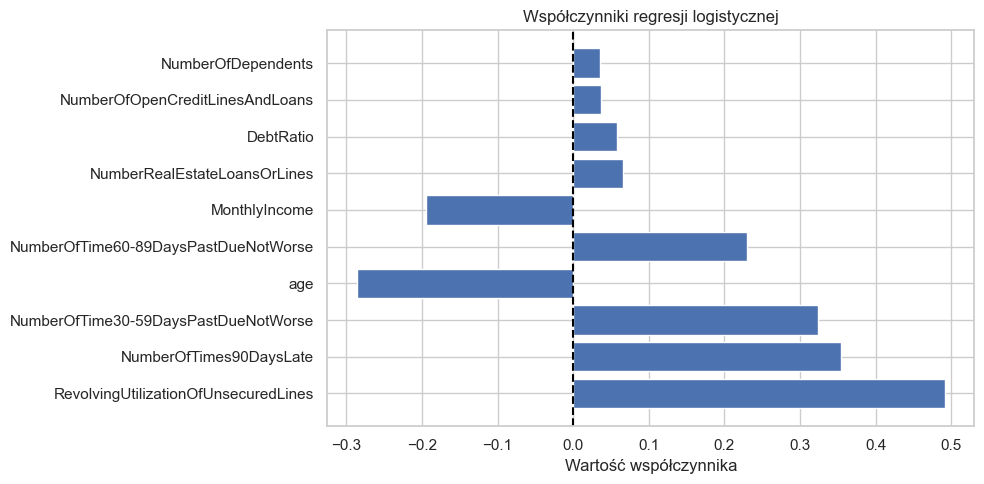

In [ ]:
# współczynniki regresji logistycznej
logreg_model = grid_logreg.best_estimator_  # z GridSearchCV

# cechy i współczynniki
coeffs = logreg_model.named_steps["clf"].coef_[0]
features = X.columns
coef_df = pd.DataFrame({"Feature": features, "Coefficient": coeffs})
coef_df["Abs"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values("Abs", ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.axvline(0, color="black", linestyle="--")
plt.title("Współczynniki regresji logistycznej")
plt.xlabel("Wartość współczynnika")
plt.tight_layout()
plt.show()

Dla regresji logistycznej interpretuję współczynniki regresji (coef_). Dodatnie wartości oznaczają, że cecha zwiększa ryzyko zaległości, a ujemne — że je zmniejsza (przy założeniu pozostałych cech bez zmian).

Na wykresie widać, że:

- największy wpływ dodatni mają:
RevolvingUtilizationOfUnsecuredLines, NumberOfTimes90DaysLate, NumberOfTime30-59DaysPastDueNotWorse

- ujemnie na ryzyko wpływają:
age, MonthlyIncome, DebtRatio

Pozostałe cechy miały marginalne znaczenie.

### XGBoost

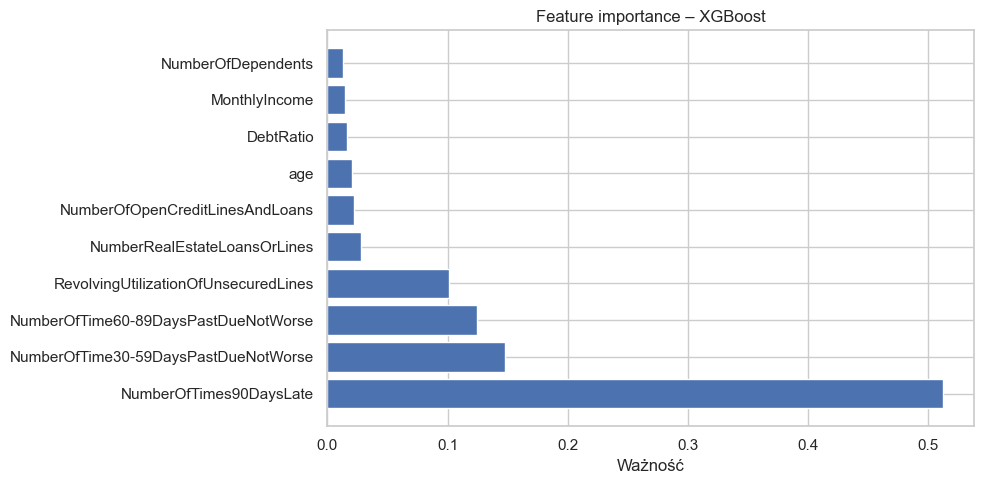

In [ ]:
# najlepszy model
xgb_model = grid_xgb.best_estimator_

# ważność cech (wbudowana)
importances = xgb_model.named_steps["clf"].feature_importances_
xgb_feat_df = pd.DataFrame({"Feature": features, "Importance": importances})
xgb_feat_df = xgb_feat_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(xgb_feat_df["Feature"], xgb_feat_df["Importance"])
plt.title("Feature importance – XGBoost")
plt.xlabel("Ważność")
plt.tight_layout()
plt.show()

Dla modelu XGBoost analizuję atrybut feature_importances_, który określa względny wpływ cech na decyzję modelu (często oparty o tzw. gain lub frequency w drzewach).

Widać, że największy wpływ na przewidywanie zaległości miały:

- NumberOfTimes90DaysLate (zdecydowanie dominująca cecha)

- NumberOfTime30-59DaysPastDueNotWorse

- NumberOfTime60-89DaysPastDueNotWorse

Pozostałe cechy miały marginalne znaczenie.

---

---

## 9. Podsumowanie i wnioski

### Porównanie modeli

W projekcie przetestowałem cztery modele klasyfikacyjne: `LogisticRegression`, `RandomForest`, `XGBoost` i `KNeighbors`. Na podstawie 5-krotnej walidacji krzyżowej oraz testu końcowego wybrałem dwa najlepsze:

- **XGBoost** osiągnął najwyższy wynik ROC AUC i F1-score, co czyni go najskuteczniejszym klasyfikatorem.
- **Regresja logistyczna** była niewiele słabsza, ale bardziej interpretowalna.

| Model               | Mean F1 | Std F1 | Mean ROC AUC | Std ROC AUC |
|--------------------|---------|--------|---------------|--------------|
| XGBClassifier       | 0.2403  | 0.0063 | **0.8622**    | 0.0038       |
| LogisticRegression  | 0.2428  | 0.0104 | 0.8413        | 0.0035       |

### Najważniejsze cechy

Na podstawie wykresów `feature_importance_` oraz współczynników `coef_` można zauważyć, że modele najczęściej polegają na następujących cechach:

- **Liczba opóźnień** (`NumberOfTimes90DaysLate`, `NumberOfTime30-59DaysPastDueNotWorse`) – najważniejszy wskaźnik ryzyka.
- **Wskaźnik wykorzystania kredytu** (`RevolvingUtilizationOfUnsecuredLines`) – bardzo istotny; im większe zadłużenie względem limitu, tym wyższe ryzyko.
- **Wiek** – starsi klienci częściej spłacają zobowiązania terminowo.
- **Dochód miesięczny** – wyższy dochód koreluje z mniejszym ryzykiem.

### Wnioski

- Największy wpływ na decyzję kredytową mają cechy związane z historią opóźnień.
- Modele uczą się skutecznie przewidywać zaległości finansowe.
- **XGBoost** to najlepszy model predykcyjny, ale **regresja logistyczna** daje prostszą interpretację wpływu cech.
- Projekt pokazuje, że nawet na stosunkowo prostym zbiorze danych można uzyskać skuteczną klasyfikację przy zachowaniu przejrzystości i dobrej interpretowalności wyników.


---

---

---